In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline

Dimensionality Reduction

In [4]:
# manual PCA
m = 60
x = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
x[:, 0], x[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
x += 0.28 * np.random.randn(m, 3)  # add more noise
x = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(x)
x += [0.2, 0, 0.2]  # shift a bit

x_centered = x - x.mean(axis=0)
U, S, Vt = np.linalg.svd(x_centered)
c1, c2 = Vt[0], Vt[1]

w2 = Vt[:2].T
x2D_manual = x_centered @ w2

In [5]:
# Using Scikit Learn
pca = PCA(n_components=2)
x2D_scikit = pca.fit_transform(x)

if you want to know how much information the components have,
you can access to this information with explained_variance_ratio
as we can see the first value set that the 75% of the information is in the first PCA
and the second component have the 15% of information
so the axis removed have a 9% of information

In [6]:
print(pca.explained_variance_ratio_)

[0.7578477  0.15186921]


In [7]:
pca = PCA(n_components=1)
x1D_scikit = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.7578477]


In [8]:
# choosing the right number of dimensions
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
x_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
x_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [9]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dimensions = np.argmax(cumsum >= 0.95) + 1

In [10]:
print(dimensions)

154


In [11]:
# if we set the number of components between 0 and 0.99 the algorithm will determined
# the ratio of variance/information you want to preserve
pca = PCA(n_components=0.95)
pca.fit(x_train)

PCA(n_components=0.95)

In [12]:
print(pca.n_components_)

154


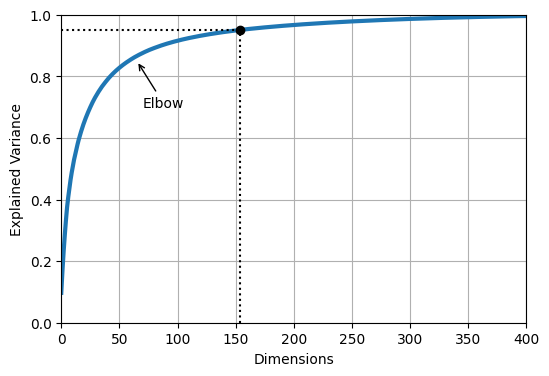

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([dimensions, dimensions], [0, 0.95], "k:")
plt.plot([0, dimensions], [0.95, 0.95], "k:")
plt.plot(dimensions, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

In [14]:
# get the best dimensions
classifier = make_pipeline(PCA(random_state=42), RandomForestClassifier(random_state=42))

In [15]:
param_distrib = {
    'pca__n_components': np.arange(10, 100),
    'randomforestclassifier__n_estimators': np.arange(50, 500)
}

In [16]:
rdn_search = RandomizedSearchCV(classifier, param_distrib, n_iter=100, cv=3, random_state=42, n_jobs=-1)
rdn_search.fit(x_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 5...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [17]:
print('RandomForestBestParameters: ', rdn_search.best_params_)

RandomForestBestParameters:  {'randomforestclassifier__n_estimators': 327, 'pca__n_components': 33}


In [18]:
classifier = make_pipeline(PCA(random_state=42), SGDClassifier(random_state=42))

In [19]:
param_distrib = {
    'pca__n_components': np.arange(10, 100)
}

In [20]:
grid_search = GridSearchCV(classifier, param_distrib, cv=3, n_jobs=-1)
grid_search.fit(x_train[:1000], y_train[:1000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [21]:
print('SGDClassifier: ', grid_search.best_params_)

SGDClassifier:  {'pca__n_components': 89}


In [22]:
# PCA for compression
pca = PCA(0.95)
X_reduced = pca.fit_transform(x_train, y_train)
x_recover = pca.inverse_transform(X_reduced)

In [23]:
# Randomize PCA
rdn_pca = PCA(n_components=154, svd_solver='randomized', random_state=42)
x_reduced_rdn = rdn_pca.fit_transform(x_train)
x_reduced_rdn

array([[ 123.93258864, -312.67426198,  -24.51405174, ...,  -62.00213296,
          -8.8147422 ,  -66.93993166],
       [1011.71837586, -294.85703831,  596.33956108, ...,  -24.52514836,
          26.58534428,   16.99077096],
       [ -51.84960804,  392.17315289, -188.50974941, ...,   -8.99144972,
          -2.99473092,   56.93622984],
       ...,
       [-178.0534496 ,  160.0782111 , -257.61308227, ...,   35.30439525,
          -2.75142691,   23.97581712],
       [ 130.60607212,   -5.59193632,  513.85867376, ...,  -15.84132904,
         -18.38612585,   39.40742042],
       [-173.43595246,  -24.71880228,  556.01889398, ...,   29.62816702,
         -52.61652274,   27.99524134]])

In [24]:
# incremental PCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

for x_batch in np.array_split(x_train, n_batches):
    inc_pca.partial_fit(x_batch)

x_reduced_inc = inc_pca.transform(x_train)
x_reduced_inc

array([[ 123.93240015,  312.67412765,   24.51396855, ...,   55.02414967,
         -18.82319306,   57.12605157],
       [1011.71883902,  294.85791533, -596.3396284 , ...,   40.79115354,
         -28.52753525,  -32.93944347],
       [ -51.84977972, -392.17395257,  188.50798593, ...,   18.5109603 ,
         -75.96611653,   -7.67736302],
       ...,
       [-178.0534095 , -160.07838721,  257.61233558, ...,  -57.3811145 ,
           6.70673288,  -54.26797595],
       [ 130.60654125,    5.59174593, -513.85834969, ...,  -22.43044205,
          12.51568244,  -36.3004746 ],
       [-173.43566358,   24.71937319, -556.01892138, ...,  -48.33215133,
          19.2936437 ,  -30.58306681]])

using mmap from numpy, we can use mmap to not charge all dataset in memory,and we only fit data taking information chunk by chunk

In [25]:
filename = 'files/my_mnist.mmap'
x_mmap = np.memmap(filename, dtype='float32', mode='write', shape=x_train.shape)
x_mmap[:] = x_train  # could be a loop instead, saving data chunk by chunk
x_mmap.flush()

In [26]:
x_mmap = np.memmap(filename, dtype='float32', mode='readonly').reshape(-1, 784)
batch_size = x_mmap.shape[0]
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
x_reduced_inc_mmap = inc_pca.fit_transform(x_mmap)

print(x_reduced_inc_mmap)

[[ 123.93221529  312.67383475   24.5098753  ...   55.01805157
    20.08182797   39.59175877]
 [1011.71792225  294.85686979 -596.34268115 ...    7.24221396
    12.4571152   -12.73866303]
 [ -51.84916083 -392.17273995  188.51402785 ...  -54.19599711
   -48.47937718  -73.27529165]
 ...
 [-178.05371247 -160.07863275  257.60825656 ...   55.54213111
   -88.00043285   -5.78646179]
 [ 130.606216      5.59211083 -513.85553477 ...   23.30797577
    -5.06252623  -65.25873585]
 [-173.43609428   24.71876986 -556.01976507 ...   52.49587972
   -12.63260001  -45.74214967]]
